In [35]:
import imageio.v2 as imageio

img = imageio.imread('ontario.jpg')

print(img.shape)




(1962, 3488, 3)


In [9]:
import torch
img = torch.from_numpy(img)
out = img.permute(2,0,1)
print(out.shape)
print(out)



torch.Size([3, 1962, 3488])
tensor([[[ 79,  78,  80,  ..., 171, 174, 177],
         [ 78,  78,  76,  ..., 174, 176, 175],
         [ 81,  83,  82,  ..., 177, 178, 176],
         ...,
         [ 30,  29,  31,  ...,  47,  44,  44],
         [ 32,  31,  33,  ...,  50,  46,  44],
         [ 32,  31,  33,  ...,  54,  49,  45]],

        [[116, 113, 115,  ..., 191, 194, 197],
         [115, 115, 113,  ..., 195, 197, 196],
         [117, 119, 117,  ..., 198, 199, 197],
         ...,
         [ 53,  52,  54,  ...,  66,  65,  67],
         [ 53,  54,  56,  ...,  71,  67,  65],
         [ 53,  54,  56,  ...,  75,  70,  66]],

        [[169, 167, 169,  ..., 224, 227, 230],
         [168, 168, 166,  ..., 226, 228, 227],
         [169, 171, 171,  ..., 229, 230, 228],
         ...,
         [ 71,  70,  72,  ...,  83,  82,  83],
         [ 72,  72,  74,  ...,  88,  84,  84],
         [ 72,  72,  74,  ...,  92,  87,  85]]], dtype=torch.uint8)


In [13]:
batch_num = 3

test = {'hello':1,"year":2001,"name":4}

for i, (k,v) in enumerate(test.items()):
    print(f'index {i} value is {v} and key is {k}')
    

index 0 value is 1 and key is hello
index 1 value is 2001 and key is year
index 2 value is 4 and key is name


In [34]:
batch = torch.zeros(batch_num,3,256,256,dtype=torch.uint8)
print(batch.shape)

# print(batch)

torch.Size([3, 3, 256, 256])


In [ ]:
batch = batch.float()

batch /= 255.0

In [45]:
from torchvision import transforms as T

In [49]:
import os

data_dir = r'C:\Users\khesr\Pictures\Cities'

prin = os.listdir(data_dir)

# print(os.path.splitext(prin[0]))
x = os.path.splitext(prin[0])

names = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1].lower() in ('.jpg','.png')]

#batch input image
batch_size = len(names)
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.float32)


transform = T.Compose([
    T.ToPILImage(),
    T.Resize((256, 256)),   # force all images to 256×256
    T.ToTensor()            # back to tensor [0,1]
])

# print(names)


for i, filename in enumerate(names):
    img = imageio.imread(os.path.join(data_dir,filename))
    img_t = torch.from_numpy(img)
    img_t = img_t.permute(2,0,1)[:3]
    img_t = transform(img_t.byte())
    batch[i] = img_t

    

print('porcessing batch completed')

porcessing batch completed


In [51]:
print(batch[[0]])

tensor([[[[0.0431, 0.0471, 0.0549,  ..., 0.4941, 0.5333, 0.5647],
          [0.0431, 0.0471, 0.0549,  ..., 0.5098, 0.5647, 0.5961],
          [0.0431, 0.0471, 0.0549,  ..., 0.5216, 0.5843, 0.6275],
          ...,
          [0.2471, 0.2510, 0.2510,  ..., 0.2784, 0.2706, 0.2392],
          [0.2392, 0.2471, 0.2549,  ..., 0.2980, 0.2863, 0.2549],
          [0.2431, 0.2510, 0.2549,  ..., 0.3137, 0.2980, 0.2745]],

         [[0.0353, 0.0353, 0.0353,  ..., 0.4588, 0.5020, 0.5255],
          [0.0353, 0.0353, 0.0353,  ..., 0.4706, 0.5255, 0.5529],
          [0.0353, 0.0353, 0.0353,  ..., 0.4784, 0.5412, 0.5804],
          ...,
          [0.2824, 0.2784, 0.2745,  ..., 0.2627, 0.2510, 0.2196],
          [0.2745, 0.2745, 0.2745,  ..., 0.2863, 0.2745, 0.2431],
          [0.2784, 0.2745, 0.2706,  ..., 0.3020, 0.2863, 0.2627]],

         [[0.0392, 0.0353, 0.0275,  ..., 0.4275, 0.4275, 0.4235],
          [0.0392, 0.0353, 0.0275,  ..., 0.4471, 0.4627, 0.4588],
          [0.0392, 0.0353, 0.0275,  ..., 0

In [57]:
# print(range(batch.shape[1])
for c in range(batch.shape[1]):
    mean = torch.mean(batch[:,c])
    std = torch.std(batch[:,c])
    batch[:,c] = (batch[:,c] - mean ) / std


print('std completedd')


std completedd


In [3]:
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
filename = "winequality-white.csv"



# response = requests.get(url)

# if response.status_code == 200:
#     with open(filename, 'wb') as f:
#         f.write(response.content)
#     print(f"Downloaded successfully and saved as '{filename}'.")
# else:
#     print(f"Failed to download. Status code: {response.status_code}")


In [ ]:
import pandas as pd

response = requests.get(url)

if response.status_code == 200:
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f'file downloaded successfully {filename}')

else:
    print(f'failed to download the file')





file downloaded successfully winequality-white.csv


In [9]:
wine = pd.read_csv('winequality-white.csv',sep=';')
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [11]:
import numpy as np 
win = np.loadtxt('winequality-white.csv',delimiter=';',dtype=np.float32,skiprows=1)
print(win)

[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]


In [12]:
import torch

win_t = torch.from_numpy(win)
print(f'type of win_t is {win_t.dtype} and type of win is {win.dtype}')

type of win_t is torch.float32 and type of win is float32


Time Series Data


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 
  
# variable information 
print(bike_sharing.variables) 


{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID': 422, 'type': 'NATIVE', 'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'venue': 'Progress

In [ ]:
X

<class 'ucimlrepo.dotdict.dotdict'>


In [12]:
y

,cnt
0,16
1,40
2,32
3,13
4,1
...,...
17374,119
17375,89
17376,90
17377,61


In [8]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [10]:
print(X[:3].to_string())

       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  windspeed
0  2011-01-01       1   0     1   0        0        6           0           1  0.24  0.2879  0.81        0.0
1  2011-01-01       1   0     1   1        0        6           0           1  0.22  0.2727  0.80        0.0
2  2011-01-01       1   0     1   2        0        6           0           1  0.22  0.2727  0.80        0.0


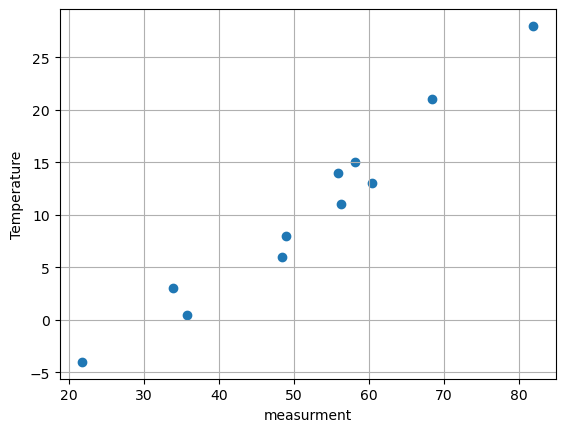

In [ ]:
import matplotlib.pyplot as plt
import torch 
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)


plt.scatter(t_u.numpy(),t_c.numpy())
plt.xlabel('measurment')
plt.ylabel('Temperature')
plt.grid()
plt.show()

In [19]:
z = torch.arange(1,5,0.7)  #.unsqueeze(0)  # shape [1,3]

print(z,' shpe',z.shape)


z = torch.arange(1,4).unsqueeze(0)  # shape [1,3]
print(z,' shpe',z.shape)


tensor([1.0000, 1.7000, 2.4000, 3.1000, 3.8000, 4.5000])  shpe torch.Size([6])
tensor([[1, 2, 3]])  shpe torch.Size([1, 3])


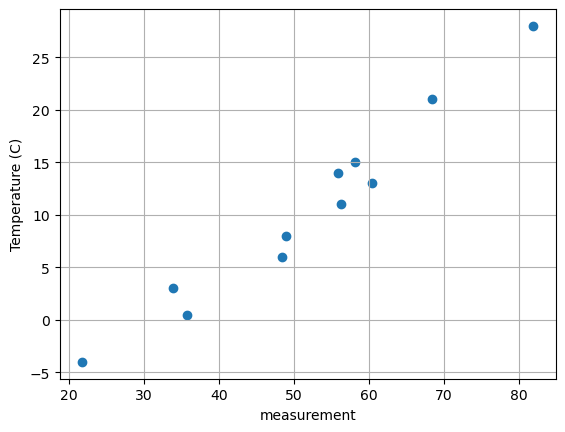

In [32]:
import matplotlib.pyplot as plt
import torch 

# Data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

plt.scatter(t_u.numpy(), t_c.numpy())
plt.xlabel('measurement')
plt.ylabel('Temperature (C)')
plt.grid()
plt.show()



In [34]:
# -----------------------------
# 1. Define model and loss
# -----------------------------
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    return ((t_p - t_c)**2).mean()   # MSE

# -----------------------------
# 2. Initialize params (with autograd)
# -----------------------------
params = torch.tensor([1.0, 0.0], requires_grad=True)  # [w, b]

print(params.shape)

torch.Size([2])


In [35]:
print(t_u)
# -----------------------------
# 3. Forward pass
# -----------------------------
w, b = params
t_p = model(t_u, w, b)         # predictions

print(t_p)


tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])
tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000], grad_fn=<AddBackward0>)


In [36]:
# -----------------------------
# 3. Forward pass
# -----------------------------

loss = loss_fn(t_p, t_c)       # scalar loss
print("Loss before backward:", float(loss))

Loss before backward: 1763.884765625


In [37]:
# -----------------------------
# 4. Backward pass (autograd computes ∂loss/∂w and ∂loss/∂b)
# -----------------------------
loss.backward()
print("Autograd gradients:", params.grad)


Autograd gradients: tensor([4517.2969,   82.6000])


In [46]:
t_p.size()

torch.Size([11])

In [38]:

# -----------------------------
# 5. Manual gradients (to check)
# -----------------------------
# Derivative wrt t_p
dloss_dtp = 2 * (t_p - t_c) / t_p.size(0)

# Chain rule: dl/dw and dl/db
dloss_dw = (dloss_dtp * t_u).sum()
dloss_db = dloss_dtp.sum()

print("Manual gradients:   ", torch.tensor([dloss_dw, dloss_db]))


Manual gradients:    tensor([4517.2964,   82.6000])
